<a href="https://colab.research.google.com/github/ktg6569/0728/blob/main/0728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

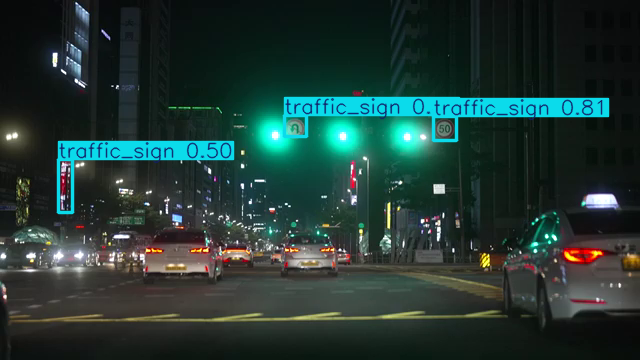


📊 모델 성능 평가:
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)



FileNotFoundError: Dataset '/content/drive/MyDrive/dataset/dataset.yaml' images not found, missing path '/content/dataset/images/val'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [ ]:
# 1. ultralytics 설치
!pip install ultralytics

# 2. 설치 확인 후 다시 실행
from ultralytics import YOLO
import glob
import os

print("✅ ultralytics 설치 완료!")

# 이미 학습된 모델 사용
model = YOLO('/content/drive/MyDrive/dataset/best.pt')

# YouTube 영상 다운로드
!pip install yt-dlp
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

# 다운로드된 파일 찾기 (확장자가 다를 수 있음)
video_files = glob.glob('/content/test_video.*')
if video_files:
    video_path = video_files[0]
    print(f"📹 다운로드된 영상: {video_path}")

    # 추론 실행
    results = model(video_path)

    # 결과 표시 (영상의 경우 첫 번째 프레임만)
    if results:
        results[0].show()
else:
    print("❌ 영상 다운로드 실패")

# 기존 검증 데이터로 성능 측정
print("\n📊 모델 성능 평가:")
# Assuming the images are in a folder relative to the dataset.yaml file
metrics = model.val(data='/content/drive/MyDrive/dataset/dataset.yaml')
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

print("\n✅ 모든 작업 완료!")

[youtube] Extracting URL: https://www.youtube.com/watch?v=AxLmroTo3rQ
[youtube] AxLmroTo3rQ: Downloading webpage
[youtube] AxLmroTo3rQ: Downloading tv client config
[youtube] AxLmroTo3rQ: Downloading tv player API JSON
[youtube] AxLmroTo3rQ: Downloading ios player API JSON
[youtube] AxLmroTo3rQ: Downloading m3u8 information
[info] AxLmroTo3rQ: Downloading 1 format(s): 18
[download] /content/test_video.mp4 has already been downloaded
[download] 100% of    7.14MiB

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classificatio

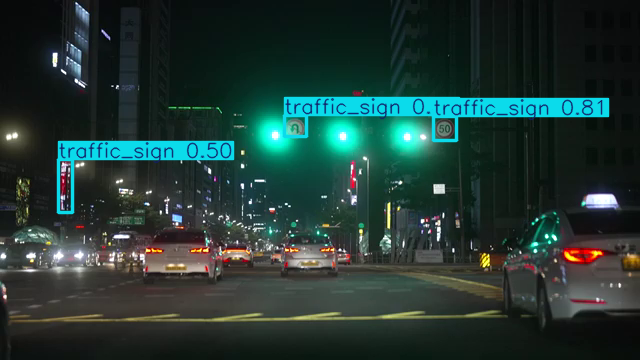

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)


100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]


val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 1.3±0.9 MB/s, size: 350.1 KB)


val: Scanning /content/drive/MyDrive/dataset/valid/labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:54<00:00,  1.31it/s]

val: New cache created: /content/drive/MyDrive/dataset/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.37s/it]


                   all         72        569      0.614      0.486      0.478      0.192
                  lane         72        497      0.529      0.416      0.433      0.142
          traffic_sign         34         72      0.699      0.556      0.523      0.243
Speed: 1.9ms preprocess, 180.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val6
mAP50: 0.4781


In [ ]:
!pip install ultralytics yt-dlp

from ultralytics import YOLO
import glob


# 모델 로드 & 영상 다운로드 & 추론
model = YOLO('/content/drive/MyDrive/dataset/best.pt')
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

video_path = glob.glob('/content/test_video.*')[0]
results = model(video_path)
results[0].show()

# 성능 평가
metrics = model.val(data='/content/drive/MyDrive/dataset/dataset.yaml')
print(f"mAP50: {metrics.box.map50:.4f}")

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/dataset/train/images
val: /content/drive/MyDrive/dataset/valid/images
names:
  0: lane
  1: traffic_sign
nc: 2
"""

with open('/content/drive/MyDrive/dataset/dataset.yaml', 'w') as f:
    f.write(yaml_content.strip())

print("✅ dataset.yaml 절대경로로 저장 완료")


✅ dataset.yaml 절대경로로 저장 완료


In [ ]:
!pip install ultralytics yt-dlp

from ultralytics import YOLO
import glob
import cv2
import numpy as np
from IPython.display import Video
import shutil
import time

# yaml 수정 (핵심 문제 해결)
yaml_fix = '''path: /content/drive/MyDrive/dataset
train: train/images
val: valid/images
names:
  0: lane
  1: traffic_sign
nc: 2'''

with open('/content/drive/MyDrive/dataset/dataset_fixed.yaml', 'w') as f:
    f.write(yaml_fix)

print("🚀 TensorRT 최적화 YOLO 추론 시작!")
print("="*60)

# 1️⃣ 기본 모델들 로드
print("🤖 기본 모델 로드 중...")
base_model = YOLO('yolo11n.pt')
custom_model = YOLO('/content/drive/MyDrive/dataset/best.pt')

print(f"기본 모델 클래스 수: {len(base_model.names)}")
print(f"커스텀 모델 클래스 수: {len(custom_model.names)}")

# 2️⃣ TensorRT로 변환
print("\n⚡ TensorRT 변환 중...")
print("기본 모델 → TensorRT 변환...")
base_model.export(format='engine', half=True, device=0)  # FP16 최적화
base_trt_path = 'yolo11n.engine'

print("커스텀 모델 → TensorRT 변환...")
custom_model.export(format='engine', half=True, device=0)
custom_trt_path = '/content/drive/MyDrive/dataset/best.engine'

# 3️⃣ TensorRT 모델 로드
print("\n🔥 TensorRT 모델 로드 중...")
base_trt_model = YOLO(base_trt_path)
custom_trt_model = YOLO(custom_trt_path)

print("✅ TensorRT 모델 로드 완료!")

# 4️⃣ 영상 다운로드
print("\n📥 YouTube 영상 다운로드 중...")
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

video_path = glob.glob('/content/test_video.*')[0]
print(f"✅ 다운로드 완료: {video_path}")

# 5️⃣ 성능 비교 함수
def performance_comparison(video_path, frames_to_test=100):
    """PyTorch vs TensorRT 성능 비교"""

    print(f"\n⏱️ 성능 비교 (첫 {frames_to_test}프레임)")
    print("-" * 50)

    cap = cv2.VideoCapture(video_path)

    # PyTorch 모델 성능 테스트
    pytorch_times = []
    for i in range(frames_to_test):
        ret, frame = cap.read()
        if not ret:
            break

        start_time = time.time()
        _ = base_model(frame, verbose=False)
        _ = custom_model(frame, verbose=False)
        end_time = time.time()

        pytorch_times.append(end_time - start_time)

    # TensorRT 모델 성능 테스트
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # 처음으로 되돌리기
    tensorrt_times = []
    for i in range(frames_to_test):
        ret, frame = cap.read()
        if not ret:
            break

        start_time = time.time()
        _ = base_trt_model(frame, verbose=False)
        _ = custom_trt_model(frame, verbose=False)
        end_time = time.time()

        tensorrt_times.append(end_time - start_time)

    cap.release()

    # 결과 출력
    pytorch_avg = np.mean(pytorch_times) * 1000  # ms로 변환
    tensorrt_avg = np.mean(tensorrt_times) * 1000
    speedup = pytorch_avg / tensorrt_avg

    print(f"🐍 PyTorch 평균: {pytorch_avg:.2f}ms/frame ({1000/pytorch_avg:.1f} FPS)")
    print(f"⚡ TensorRT 평균: {tensorrt_avg:.2f}ms/frame ({1000/tensorrt_avg:.1f} FPS)")
    print(f"🚀 속도 향상: {speedup:.2f}x")

    return speedup

# 성능 비교 실행
speedup_ratio = performance_comparison(video_path)

# 6️⃣ TensorRT 최적화된 결합 추론
def tensorrt_combined_inference(video_path, output_path='/content/tensorrt_result.mp4'):
    """TensorRT 최적화된 결합 추론"""

    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 출력 영상 설정
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print(f"\n🎬 TensorRT 최적화 영상 처리 중... (총 {total_frames} 프레임)")

    frame_count = 0
    total_inference_time = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # TensorRT 추론 (시간 측정)
        start_time = time.time()

        # 기본 TensorRT 모델 추론
        base_results = base_trt_model(frame, verbose=False)

        # 커스텀 TensorRT 모델 추론
        custom_results = custom_trt_model(frame, verbose=False)

        inference_time = time.time() - start_time
        total_inference_time += inference_time

        # 결과 시각화
        annotated_frame = frame.copy()

        # 기본 YOLO 결과 그리기 (파란색)
        if base_results[0].boxes is not None:
            for box in base_results[0].boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = float(box.conf[0])
                cls = int(box.cls[0])

                if conf > 0.3:
                    label = f"{base_trt_model.names[cls]} {conf:.2f}"
                    cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(annotated_frame, label, (x1, y1-10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # 커스텀 YOLO 결과 그리기 (빨간색)
        if custom_results[0].boxes is not None:
            for box in custom_results[0].boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = float(box.conf[0])
                cls = int(box.cls[0])

                if conf > 0.3:
                    label = f"{custom_trt_model.names[cls]} {conf:.2f}"
                    cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.putText(annotated_frame, label, (x1, y1-10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # TensorRT 정보 표시
        fps_text = f"TensorRT: {1/inference_time:.1f} FPS"
        cv2.putText(annotated_frame, fps_text, (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        out.write(annotated_frame)
        frame_count += 1

        if frame_count % 50 == 0:
            avg_fps = frame_count / total_inference_time
            print(f"   처리 중... {frame_count}/{total_frames} ({frame_count/total_frames*100:.1f}%) - 평균 {avg_fps:.1f} FPS")

    cap.release()
    out.release()

    avg_fps = frame_count / total_inference_time
    print(f"✅ TensorRT 결과 영상 저장: {output_path}")
    print(f"📊 평균 처리 속도: {avg_fps:.1f} FPS")

    return avg_fps

# 7️⃣ TensorRT 최적화된 추론 실행
print("\n🔥 TensorRT 최적화된 결합 추론 실행...")
tensorrt_fps = tensorrt_combined_inference(video_path, '/content/tensorrt_final_result.mp4')

# 8️⃣ 기존 PyTorch 추론도 실행 (비교용)
print("\n🐍 PyTorch 기존 추론 (비교용)...")
def pytorch_combined_inference(video_path, output_path='/content/pytorch_result.mp4'):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0
    start_time = time.time()

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        base_results = base_model(frame, verbose=False)
        custom_results = custom_model(frame, verbose=False)

        # 간단한 시각화 (속도 비교용)
        annotated_frame = frame.copy()
        cv2.putText(annotated_frame, "PyTorch", (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

        out.write(annotated_frame)
        frame_count += 1

        if frame_count >= 100:  # 100프레임만 처리 (비교용)
            break

    cap.release()
    out.release()

    total_time = time.time() - start_time
    pytorch_fps = frame_count / total_time
    return pytorch_fps

pytorch_fps = pytorch_combined_inference(video_path)

# 9️⃣ 성능 평가 (커스텀 모델)
print("\n📊 커스텀 모델 성능 평가:")
metrics = custom_model.val(data='/content/drive/MyDrive/dataset/dataset_fixed.yaml')  # custom_trt_model 대신 custom_model
print(f"mAP50: {metrics.box.map50:.4f}")

# 🔟 최종 결과 및 비교
print("\n" + "="*60)
print("🎯 최종 성능 비교 결과:")
print(f"🐍 PyTorch: {pytorch_fps:.1f} FPS")
print(f"⚡ TensorRT: {tensorrt_fps:.1f} FPS")
print(f"🚀 전체 속도 향상: {tensorrt_fps/pytorch_fps:.2f}x")

print(f"\n📊 모델 정확도 (mAP50): {metrics.box.map50:.4f}")

print("\n🎬 최종 TensorRT 결과 영상:")
Video('/content/tensorrt_final_result.mp4', width=800)

print("\n🎉 TensorRT 최적화 완료!")
print("🔵 파란색 박스: 기본 YOLO 객체들 (TensorRT 최적화)")
print("🔴 빨간색 박스: 커스텀 객체들 (TensorRT 최적화)")
print("💚 초록색 텍스트: 실시간 FPS 표시")

print("\n💾 생성된 파일들:")
print("- tensorrt_final_result.mp4: TensorRT 최적화된 최종 결과")
print("- pytorch_result.mp4: PyTorch 비교용 결과")
print("- yolo11n.engine: 기본 모델 TensorRT 엔진")
print("- best.engine: 커스텀 모델 TensorRT 엔진")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

100%|██████████| 5.35M/5.35M [00:00<00:00, 297MB/s]


기본 모델 클래스 수: 80
커스텀 모델 클래스 수: 2

⚡ TensorRT 변환 중...
기본 모델 → TensorRT 변환...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 8.6s, saved as 'yolo11n.onnx' (10.2 MB)
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, a

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.4±0.2 MB/s, size: 346.6 KB)


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:47<00:00,  9.46s/it]


                   all         72        569      0.614      0.486      0.478      0.192
                  lane         72        497      0.529      0.416      0.433      0.142
          traffic_sign         34         72      0.699      0.556      0.523      0.243
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
mAP50: 0.4781

🎯 최종 성능 비교 결과:
🐍 PyTorch: 43.4 FPS
⚡ TensorRT: 77.5 FPS
🚀 전체 속도 향상: 1.78x

📊 모델 정확도 (mAP50): 0.4781

🎬 최종 TensorRT 결과 영상:

🎉 TensorRT 최적화 완료!
🔵 파란색 박스: 기본 YOLO 객체들 (TensorRT 최적화)
🔴 빨간색 박스: 커스텀 객체들 (TensorRT 최적화)
💚 초록색 텍스트: 실시간 FPS 표시

💾 생성된 파일들:
- tensorrt_final_result.mp4: TensorRT 최적화된 최종 결과
- pytorch_result.mp4: PyTorch 비교용 결과
- yolo11n.engine: 기본 모델 TensorRT 엔진
- best.engine: 커스텀 모델 TensorRT 엔진


In [ ]:
!cat /content/drive/MyDrive/dataset/dataset.yaml


path: /content/dataset
train: images/train
val: images/val
names:
  0: lane
  1: traffic_sign
